In [2]:
import requests
from bs4 import BeautifulSoup
import re
import urllib3
import codecs
from urllib.request import urlopen

In [3]:
estilo = "vertical-align: top;"
estilo_tabla = "margin: 0px auto;"
tipo_de_archivo = ".txt"
empty_string = ""
div_class = "Kvw2ac"

In [5]:
def get_soup_from_url(url):

    """Con esta función podemos devolver la sopa parseada en html"""

    request_de_la_cancion = requests.get(url)
    html_de_la_cancion = request_de_la_cancion.text
    return BeautifulSoup(html_de_la_cancion, "html.parser")

In [6]:
article = "article"

def get_text_from_letras_com_soup(nombre_del_cantante, url):

    """Función para guardar las letras de un artista en un archivo"""

    soup = get_soup_from_url(url)
    text_of_soup = soup.find(article).get_text(" ")
    text_without_header = clean_text_of_soup(nombre_del_cantante, text_of_soup).lstrip()

    return save_to_file(nombre_del_cantante, text_without_header)

In [20]:
# CÁLCULO DEL NÚMERO DE CANCIONES EN LOS 2 PRIMEROS ÁLBUMS

with open("Nach.txt", "r") as file:
    y = file.read()
    print(len(y.split("\n"))-1)

22


In [22]:
with open("Nach_canciones.txt", "r") as file:
    y = file.read()
    song_list = [str(song) for song in y.split("\n")]
    print(song_list)

['https://www.letras.com/nach/1079341/', 'https://www.letras.com/nach/1079334/', 'https://www.letras.com/nach/1079342/', 'https://www.letras.com/nach/1079354/', 'https://www.letras.com/nach/1079346/', 'https://www.letras.com/nach/1079337/', 'https://www.letras.com/nach/1079339/', 'https://www.letras.com/nach/1079347/', 'https://www.letras.com/nach/1079348/', 'https://www.letras.com/nach/1079351/', 'https://www.letras.com/nach/657580/', 'https://www.letras.com/nach/499952/', 'https://www.letras.com/nach/1079357/', 'https://www.letras.com/nach/1079372/', 'https://www.letras.com/nach/1079374/', 'https://www.letras.com/nach/492586/', 'https://www.letras.com/nach/1079368/', 'https://www.letras.com/nach/1079378/', 'https://www.letras.com/nach/1079386/', 'https://www.letras.com/nach/1079401/', 'https://www.letras.com/nach/657581/', 'https://www.letras.com/nach/1079356/']


## PROBANDO COSAS DE MONGO

In [1]:
import pymongo

In [2]:
myclient = pymongo.MongoClient("mongodb://localhost:27017")
mydatabase = myclient["rapstats"]
mycollection = mydatabase["artists_raw"]

In [3]:
nach = mycollection.find_one("Nach")
average_per_song = len(nach["text_raw"])/nach["number_of_songs"]


In [43]:
nach.update({ set: {"average_per_song" : average_per_song}})

In [70]:
mydatabase.artists_raw.update_one(
    {"_id": "Nach"}, 
    {"$set": {"average_per_song" : average_per_song}},
    upsert=True
)

In [65]:
type(nach)

dict

In [5]:
nach2 = mydatabase.artists_raw.find_one("Nach")

In [7]:
nach2["word_average_per_song"]

465.2402597402597

In [9]:
nach2["text_raw"]

['Pido',
 'permiso',
 'señores',
 'que',
 'este',
 'es',
 'mi',
 'HipHop',
 'y',
 'mi',
 'HipHop',
 'habla',
 'por',
 'mí',
 'y',
 'mi',
 'voz',
 'entre',
 'sus',
 'melodías',
 'dirá',
 'dirá',
 'por',
 'qué',
 'rimo',
 'así',
 'por',
 'qué',
 'desde',
 'que',
 'nací',
 'desde',
 'que',
 'mi',
 'madre',
 'me',
 'mecía',
 'en',
 'su',
 'regazo',
 'sabía',
 'que',
 'tenía',
 'entre',
 'sus',
 'brazos',
 'un',
 'guerrero',
 'un',
 'luchador',
 'Y',
 'yo',
 'me',
 'hicé',
 'en',
 'HipHop',
 'me',
 'fui',
 'modelando',
 'en',
 'barro',
 'en',
 'rabia',
 'en',
 'la',
 'reveldía',
 'del',
 'que',
 'es',
 'fuerte',
 'y',
 'tiene',
 'que',
 'cruzar',
 'los',
 'brazos',
 'cuando',
 'la',
 'vida',
 'impone',
 'su',
 'ley',
 'Y',
 'yo',
 'me',
 'hicé',
 'en',
 'HipHop',
 '¿por',
 'que',
 'Porque',
 'el',
 'HipHop',
 'es',
 'macho',
 'el',
 'HipHop',
 'es',
 'fuerte',
 'tiene',
 'olor',
 'a',
 'vida',
 'pero',
 'sabe',
 'a',
 'muerte',
 'porque',
 'soy',
 'un',
 'árbol',
 'que',
 'nunca',
 'dio',
 

In [15]:
from wordcloud import WordCloud, STOPWORDS

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

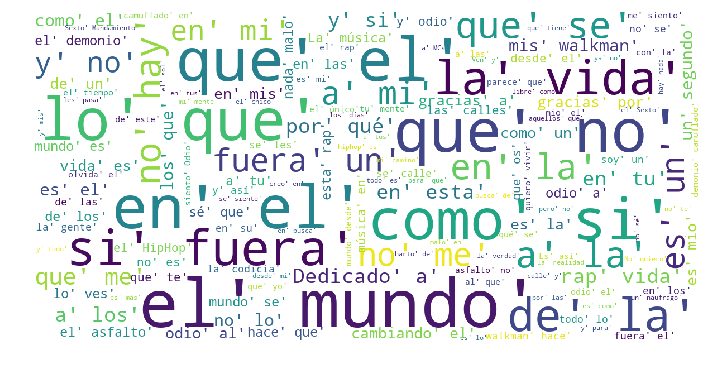

NoneType

In [19]:
stopwords = set(STOPWORDS)


def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

type(show_wordcloud(nach2["text_raw"]))